In [1]:
#Classification based on to_randomly_generated_account string values

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

###########Wenxuan use your local path below
df1 = pd.read_csv('C:\\Users\\prane\\Documents\\Univ_of_Bristol\\mini-project\\my_data.csv')

# One-hot encode categorical features (if any)
df = pd.get_dummies(df1, columns=['to_randomly_generated_account'], prefix='', prefix_sep='')


#Training the model on mydata
# Splitting the dataset into features (X) and labels (y)
X = df.drop('label', axis=1)
y = df['label']

# Initialize and train the Random Forest model
model = RandomForestClassifier()
model.fit(X, y)


#Prediction Using orignal dataset

#df2 = pd.read_csv('C:\\Users\\prane\\Documents\\Univ_of_Bristol\\mini-project\\dummy\\fake_transactional_data_24.csv')

###########Wenxuan use your local path below
df2 = pd.read_csv('C:\\Users\\prane\\Documents\\Univ_of_Bristol\\mini-project\\fake_transactional_data_24.csv', parse_dates=['not_happened_yet_date'], dayfirst=True)
#df2 = pd.read_csv('C:\\Users\\prane\\Documents\\Univ_of_Bristol\\mini-project\\backup-file\\fake_transactional_data_24.csv')

df2_str = df2[df2['to_randomly_generated_account'].astype(str).str.match('^[a-zA-Z_&]')]
df2_filtered = pd.DataFrame({
    'from_totally_fake_account' : df2_str['from_totally_fake_account'],
    'to_randomly_generated_account': df2_str['to_randomly_generated_account']
})

df2_encoded = pd.get_dummies(df2_filtered['to_randomly_generated_account'], columns=['to_randomly_generated_account'], prefix='', prefix_sep='')
#print(df2_encoded)
df2_encoded_sorted = df2_encoded.reindex(columns=df.iloc[:, 1:].columns, fill_value=0)

# Predict on the test set
predictions = model.predict(df2_encoded_sorted)
df2_filtered['predicted_label'] = predictions
print("Classification is as follows")
print(df2_filtered.head())
print("-------------------------------------------------------")

# Create a mapping dictionary from 'to_randomly_generated_account' to 'label'
label_mapping = df2_filtered.set_index('to_randomly_generated_account')['predicted_label'].to_dict()

# Add the label column to the original DataFrame using map
df2['predicted_label'] = df2['to_randomly_generated_account'].map(label_mapping)

# Display the updated DataFrame
print("After merging the classification to original df is as follows")
print(df2.head())
print(df2.shape)

Classification is as follows
   from_totally_fake_account to_randomly_generated_account predicted_label
0                    10371.0                        CINEMA          CINEMA
3                    18555.0           HIPSTER_COFFEE_SHOP            CAFE
5                    18555.0    TOTALLY_A_REAL_COFFEE_SHOP            CAFE
6                    18555.0                   COFFEE_SHOP            CAFE
7                    18555.0                          CAFE            CAFE
-------------------------------------------------------
After merging the classification to original df is as follows
   from_totally_fake_account  monopoly_money_amount  \
0                    10371.0                   4.00   
1                    88339.0                   2.40   
2                    18555.0                   2.40   
3                    18555.0                   4.10   
4                    80792.0                   1.95   

  to_randomly_generated_account not_happened_yet_date predicted_label  


In [2]:
# Clustering based on money spent
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Group transactions by account number and sum the transaction amounts
account_sum = df2.groupby('from_totally_fake_account')['monopoly_money_amount'].sum().reset_index()
print("Distinct account no.'s with sum of amount:'")
print(len(account_sum))  #8142
print("-------------------------------------------------------")

# Extract relevant features (assuming 'transaction_amount' is the column of interest)
features = account_sum[['monopoly_money_amount']]

# Apply KMeans clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
account_sum['cluster'] = kmeans.fit_predict(features)

# Validate count of cluster , total=8142
print("Cluster count:")
print(account_sum.groupby('cluster').size().reset_index(name='count'))
print("-------------------------------------------------------")

cluster_ranges = account_sum.groupby('cluster')['monopoly_money_amount'].agg(['min', 'max']).reset_index()
print("Cluster range:")
print(cluster_ranges)
print("-------------------------------------------------------")

print("After clustering result:")
print(account_sum.head())
print("-------------------------------------------------------")


# Create a mapping dictionary from 'to_randomly_generated_account' to 'label'
label_mapping2 = account_sum.set_index('from_totally_fake_account')['cluster'].to_dict()

# Add the label column to the original DataFrame using map
df2['cluster'] = df2['from_totally_fake_account'].map(label_mapping2)

print("After merging the cluster info to original df is as follows")
print(df2.head())
print(df2.shape)


Distinct account no.'s with sum of amount:'
8142
-------------------------------------------------------


C:\Users\prane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster count:
   cluster  count
0        0   1590
1        1   6011
2        2    541
-------------------------------------------------------
Cluster range:
   cluster      min      max
0        0   467.35  1199.82
1        1    25.50   467.18
2        2  1201.60  2511.28
-------------------------------------------------------
After clustering result:
   from_totally_fake_account  monopoly_money_amount  cluster
0                     1000.0                2041.21        2
1                     1002.0                 500.21        0
2                     1006.0                 369.63        1
3                     1018.0                 124.96        1
4                     1053.0                 520.57        0
-------------------------------------------------------
After merging the cluster info to original df is as follows
   from_totally_fake_account  monopoly_money_amount  \
0                    10371.0                   4.00   
1                    88339.0                   2.40  

In [ ]:
#Plots for customer behavior and data insights

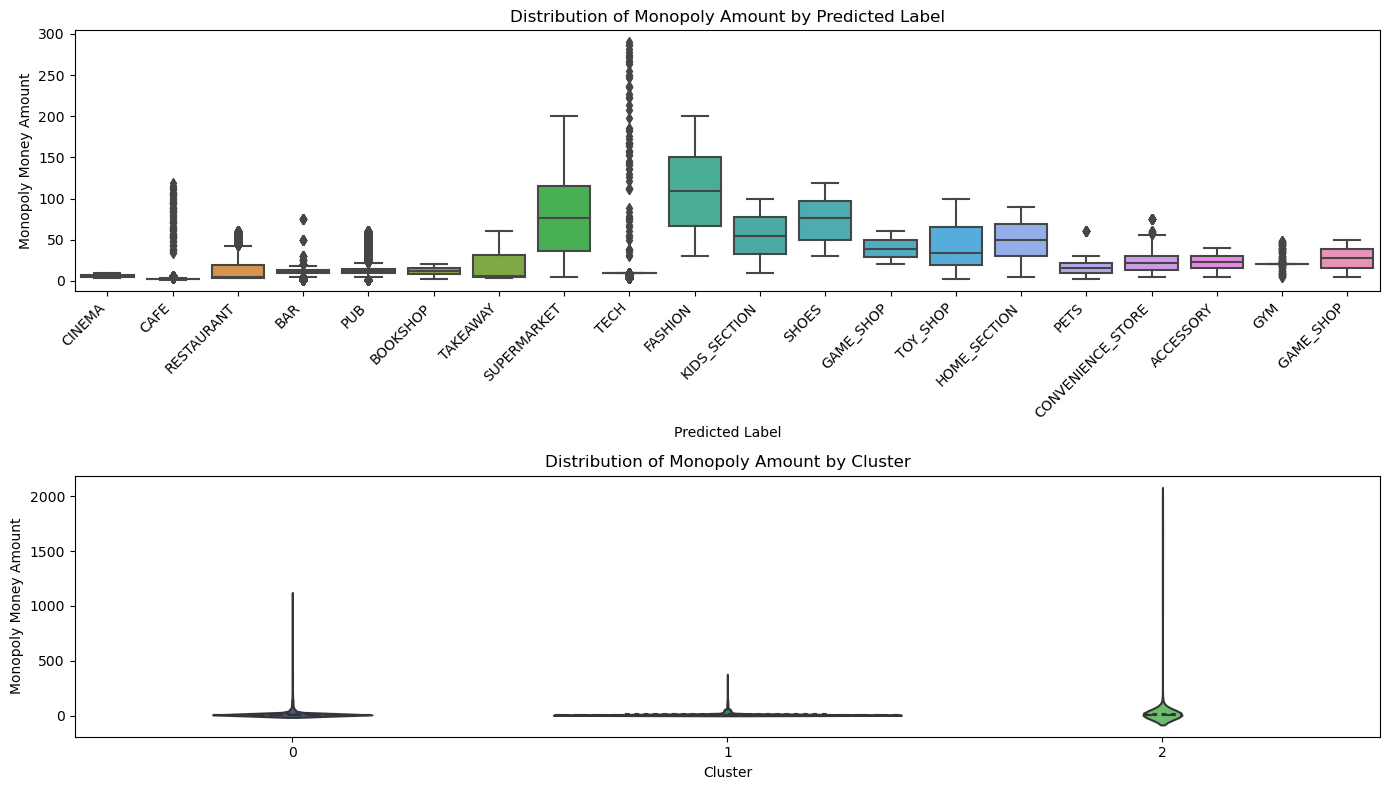

In [5]:
#1.1 Distribution of monopoly amount in each category

import seaborn as sns

plt.figure(figsize=(14, 8))

# Box plot for predicted_label
plt.subplot(2, 1, 1)
sns.boxplot(x='predicted_label', y='monopoly_money_amount', data=df2)
plt.title('Distribution of Monopoly Amount by Predicted Label')
plt.xlabel('Predicted Label')
plt.ylabel('Monopoly Money Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Violin plot for predicted_label
plt.subplot(2, 1, 2)
sns.violinplot(x='cluster', y='monopoly_money_amount', data=df2, inner='quartile', palette='viridis')
plt.title('Distribution of Monopoly Amount by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monopoly Money Amount')

plt.tight_layout()
plt.show()


In [9]:
#1.2 identify trend for popular spend month - active users per month


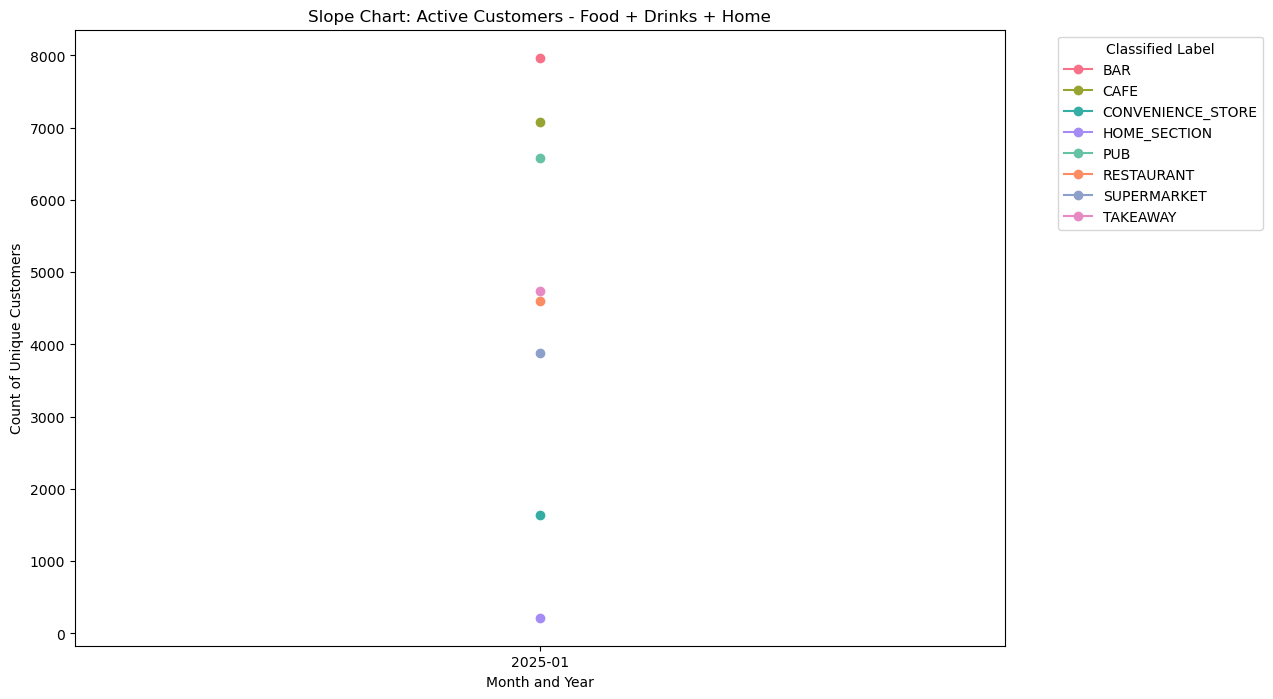

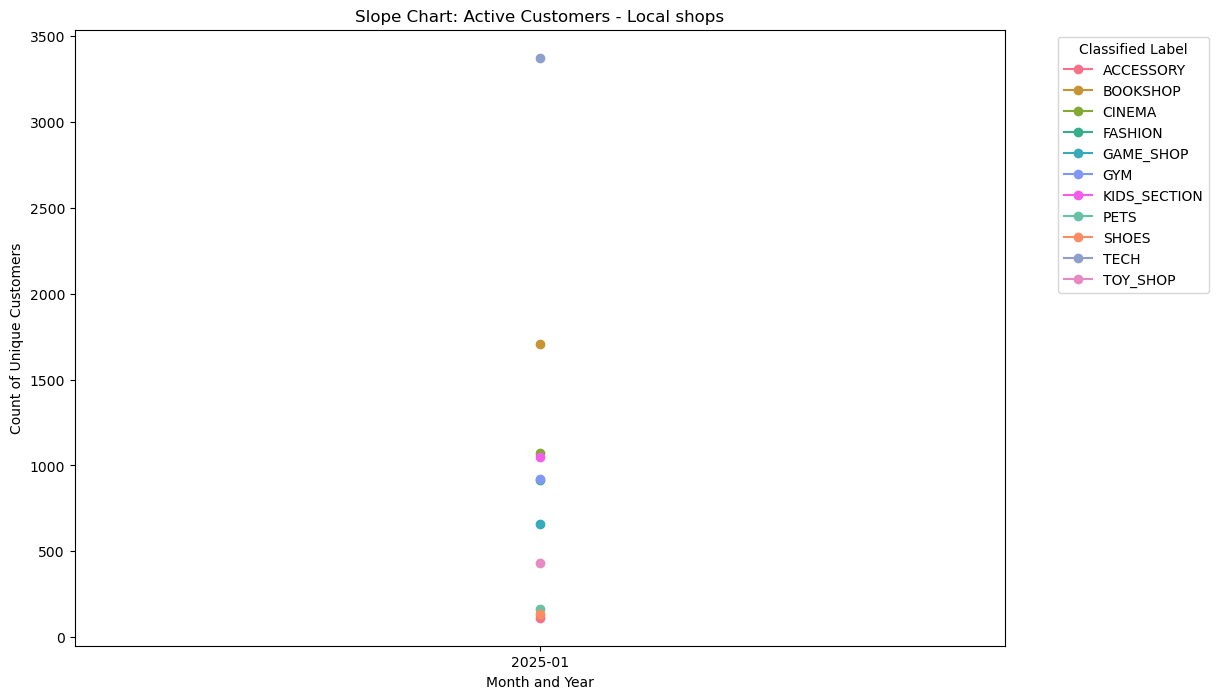

In [10]:
#1.3 active users per category

#data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], format='%m/%d/%Y')
df2['month_year'] = df2['not_happened_yet_date'].dt.to_period('M')

data = df2.copy()

# Convert 'from_totally_fake_account' to numeric, handle errors='coerce'
data['from_totally_fake_account'] = pd.to_numeric(data['from_totally_fake_account'], errors='coerce')

# Convert 'predicted_label' to category for better plotting
data['predicted_label'] = data['predicted_label'].astype('category')

# Group by 'month_year' and 'predicted_label', then count unique customers
grouped_data = data.groupby(['month_year', 'predicted_label'])['from_totally_fake_account'].nunique().reset_index(name='customer_count')

# Ensure 'customer_count' is numeric
grouped_data['customer_count'] = pd.to_numeric(grouped_data['customer_count'], errors='coerce')

# Define groups of predicted_label based on behavior
grouped_labels = {
    'Food + Drinks + Home': ['CAFE', 'RESTAURANT', 'TAKEAWAY', 'BAR', 'PUB', 'SUPERMARKET', 'CONVENIENCE_STORE', 'HOME_SECTION'],
    'Local shops': ['CINEMA', 'FASHION', 'SHOES', 'GYM', 'ACCESSORY', 'TECH', 'GAME_SHOP', 'TOY_SHOP', 'PETS', 'KIDS_SECTION', 'BOOKSHOP'],
}

# Plotting slope chart for each group
for group, labels in grouped_labels.items():
    group_data = grouped_data[grouped_data['predicted_label'].isin(labels)]

    plt.figure(figsize=(12, 8))
    categories = group_data['predicted_label'].unique()
    
    husl_palette = sns.color_palette("husl", n_colors=len(categories) - 4)
    set2_palette = sns.color_palette("Set2", n_colors=4)
    my_palette = husl_palette + set2_palette
    #colors = sns.color_palette("husl", n_colors=len(my_palette))
    colors = sns.color_palette(my_palette, n_colors=len(my_palette))

    for i, category in enumerate(categories):
        plt.plot(range(len(group_data['month_year'].unique())), group_data[group_data['predicted_label'] == category]['customer_count'], marker='o', color=colors[i], label=category)

    plt.xticks(range(len(group_data['month_year'].unique())), group_data['month_year'].unique())
    plt.title(f'Slope Chart: Active Customers - {group}')
    plt.xlabel('Month and Year')
    plt.ylabel('Count of Unique Customers')
    plt.legend(title='Classified Label', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [ ]:
#1.5 identify high value month - total amount spent in every month - using monopoly amount


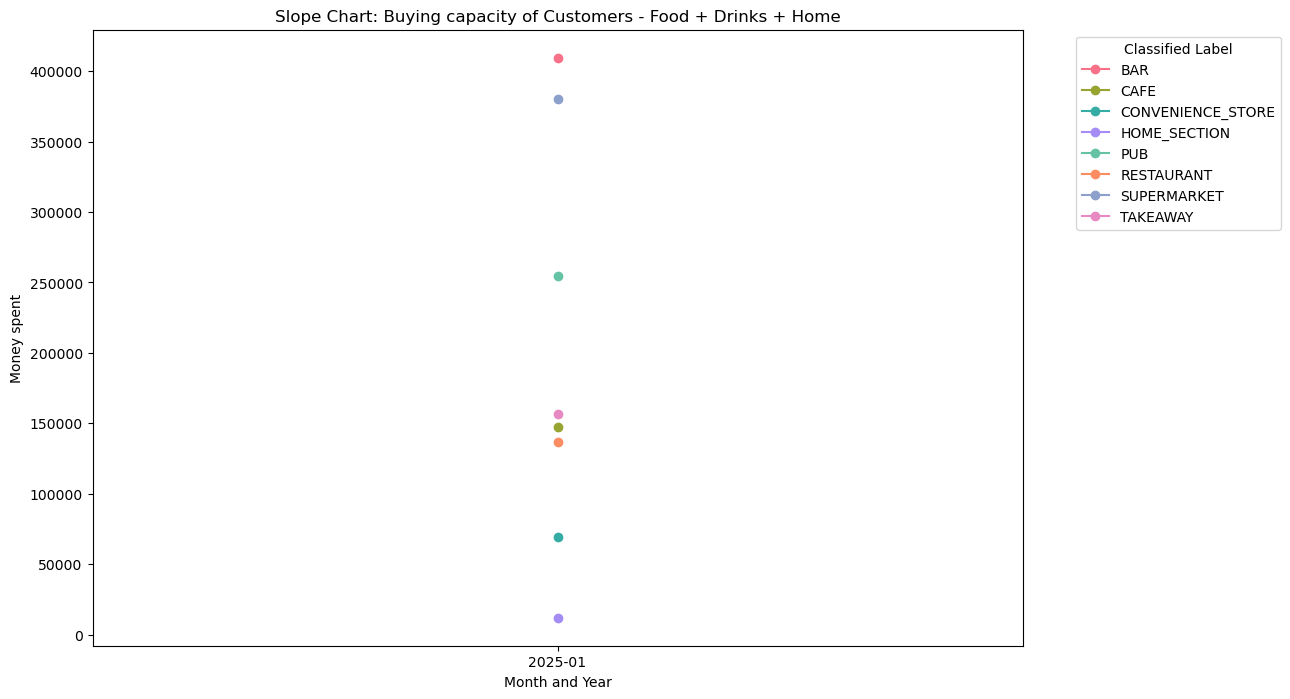

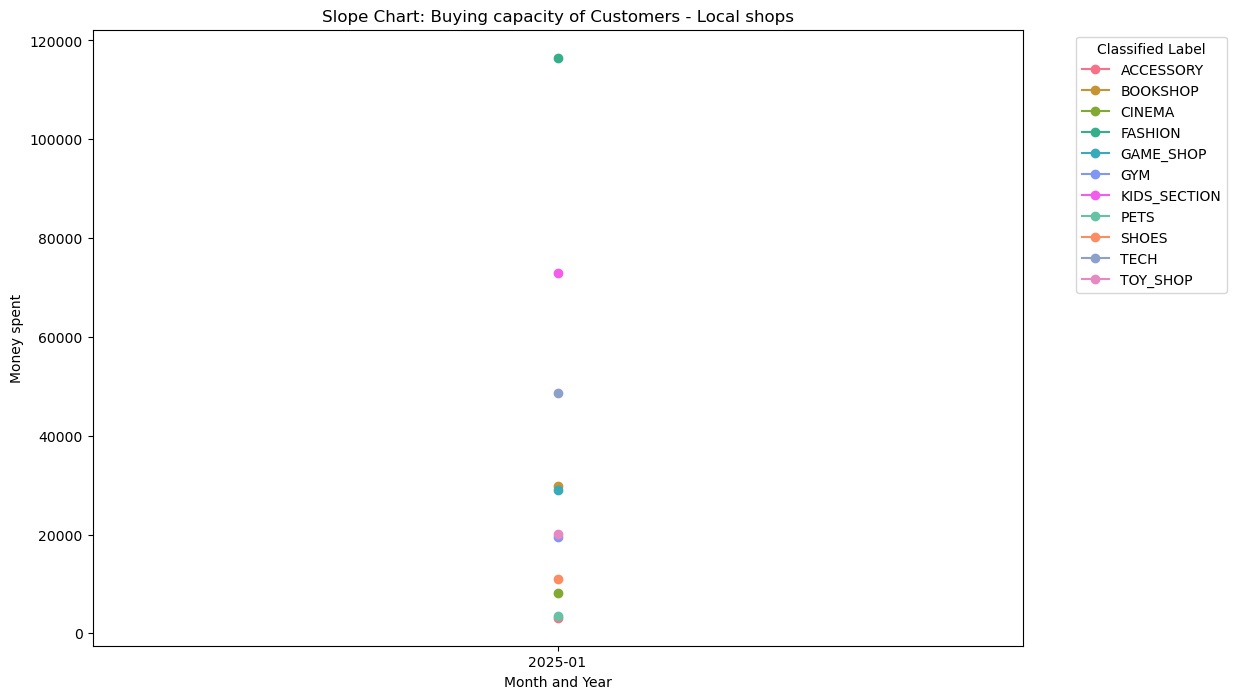

In [14]:
#1.6 monthly trends to find high value category - using monopoly amount

grouped_data['customer_spend'] = df2.groupby(['month_year', 'predicted_label'])['monopoly_money_amount'].sum().reset_index(name='customer_spend')['customer_spend']

# Ensure 'customer_count' is numeric
grouped_data['customer_spend'] = pd.to_numeric(grouped_data['customer_spend'], errors='coerce')

# Define groups of predicted_label based on behavior
grouped_labels = {
    'Food + Drinks + Home': ['CAFE', 'RESTAURANT', 'TAKEAWAY', 'BAR', 'PUB', 'SUPERMARKET', 'CONVENIENCE_STORE', 'HOME_SECTION'],
    'Local shops': ['CINEMA', 'FASHION', 'SHOES', 'GYM', 'ACCESSORY', 'TECH', 'GAME_SHOP', 'TOY_SHOP', 'PETS', 'KIDS_SECTION', 'BOOKSHOP'],
}

# Plotting slope chart for each group
for group, labels in grouped_labels.items():
    group_data = grouped_data[grouped_data['predicted_label'].isin(labels)]

    plt.figure(figsize=(12, 8))
    categories = group_data['predicted_label'].unique()
    
    husl_palette = sns.color_palette("husl", n_colors=len(categories) - 4)
    set2_palette = sns.color_palette("Set2", n_colors=4)
    my_palette = husl_palette + set2_palette
    #colors = sns.color_palette("husl", n_colors=len(my_palette))
    colors = sns.color_palette(my_palette, n_colors=len(my_palette))

    for i, category in enumerate(categories):
        plt.plot(range(len(group_data['month_year'].unique())), group_data[group_data['predicted_label'] == category]['customer_spend'], marker='o', color=colors[i], label=category)

    plt.xticks(range(len(group_data['month_year'].unique())), group_data['month_year'].unique())
    plt.title(f'Slope Chart: Buying capacity of Customers - {group}')
    plt.xlabel('Month and Year')
    plt.ylabel('Money spent')
    plt.legend(title='Classified Label', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

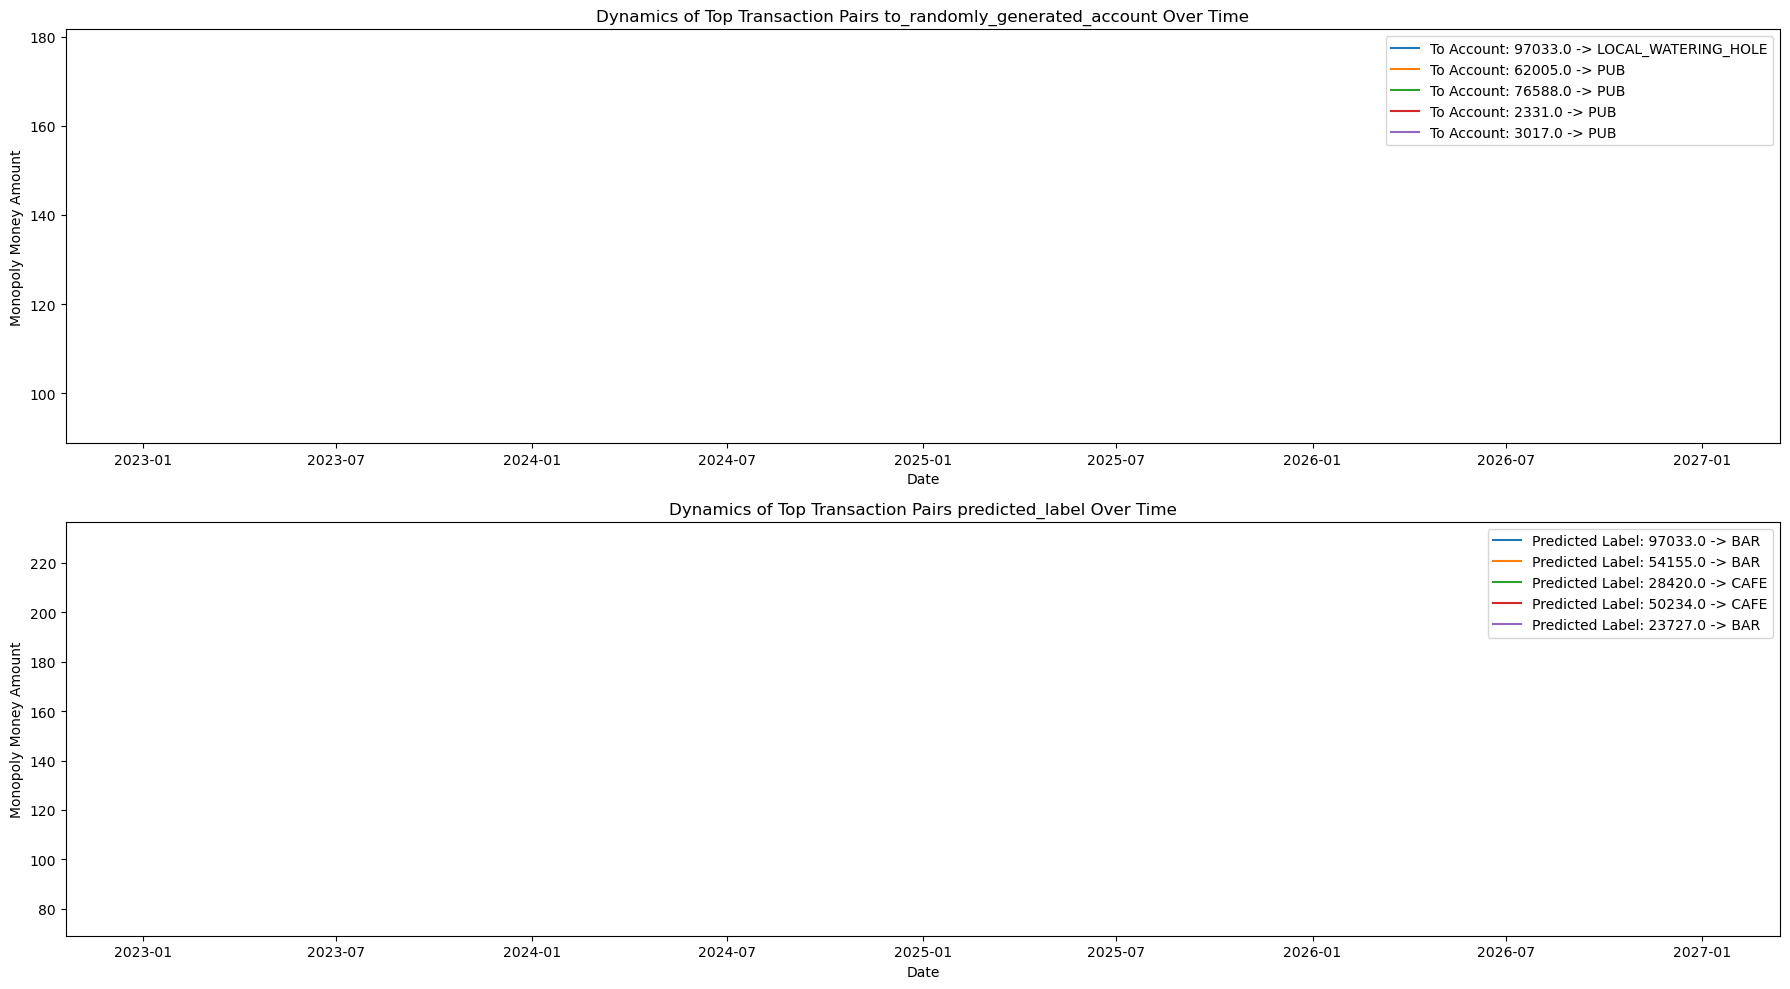

In [15]:
#2. Transaction Patterns : patterns of transactions between different account numbers

# Convert 'not_happened_yet_date' to datetime
#df2['not_happened_yet_date'] = pd.to_datetime(df2['not_happened_yet_date'], format='%m/%d/%Y')

# Explore patterns between 'from_totally_fake_account' and 'to_randomly_generated_account'
account_pair_counts_to_account = df2.groupby(['from_totally_fake_account', 'to_randomly_generated_account']).size().reset_index(name='transaction_count_to_account')

# Explore patterns between 'from_totally_fake_account' and 'predicted_label'
account_pair_counts_predicted_label = df2.groupby(['from_totally_fake_account', 'predicted_label']).size().reset_index(name='transaction_count_predicted_label')

# Identify frequently occurring pairs for both 'to_randomly_generated_account' and 'predicted_label'
top_pairs_to_account = account_pair_counts_to_account.sort_values(by='transaction_count_to_account', ascending=False).head(5)
top_pairs_predicted_label = account_pair_counts_predicted_label.sort_values(by='transaction_count_predicted_label', ascending=False).head(5)

# Plot the dynamics of the top pairs over time
plt.figure(figsize=(18, 10))

# Plot for 'to_randomly_generated_account'
plt.subplot(2, 1, 1)
for index, row in top_pairs_to_account.iterrows():
    pair_data = df2[(df2['from_totally_fake_account'] == row['from_totally_fake_account']) & (df2['to_randomly_generated_account'] == row['to_randomly_generated_account'])]
    pair_data_monthly = pair_data.groupby(pair_data['not_happened_yet_date'].dt.to_period("M")).agg({'monopoly_money_amount': 'sum'}).reset_index()
    plt.plot(pair_data_monthly['not_happened_yet_date'].dt.to_timestamp(), pair_data_monthly['monopoly_money_amount'], label=f"To Account: {row['from_totally_fake_account']} -> {row['to_randomly_generated_account']}")
    
    
plt.title('Dynamics of Top Transaction Pairs to_randomly_generated_account Over Time')
plt.xlabel('Date')
plt.ylabel('Monopoly Money Amount')
plt.legend(loc='upper right')

# Plot for 'predicted_label'
plt.subplot(2, 1, 2)
for index, row in top_pairs_predicted_label.iterrows():
    pair_data = df2[(df2['from_totally_fake_account'] == row['from_totally_fake_account']) & (df2['predicted_label'] == row['predicted_label'])]
    pair_data_monthly = pair_data.groupby(pair_data['not_happened_yet_date'].dt.to_period("M")).agg({'monopoly_money_amount': 'sum'}).reset_index()
    plt.plot(pair_data_monthly['not_happened_yet_date'].dt.to_timestamp(), pair_data_monthly['monopoly_money_amount'], label=f"Predicted Label: {row['from_totally_fake_account']} -> {row['predicted_label']}")
    
    
plt.title('Dynamics of Top Transaction Pairs predicted_label Over Time')
plt.xlabel('Date')
plt.ylabel('Monopoly Money Amount')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


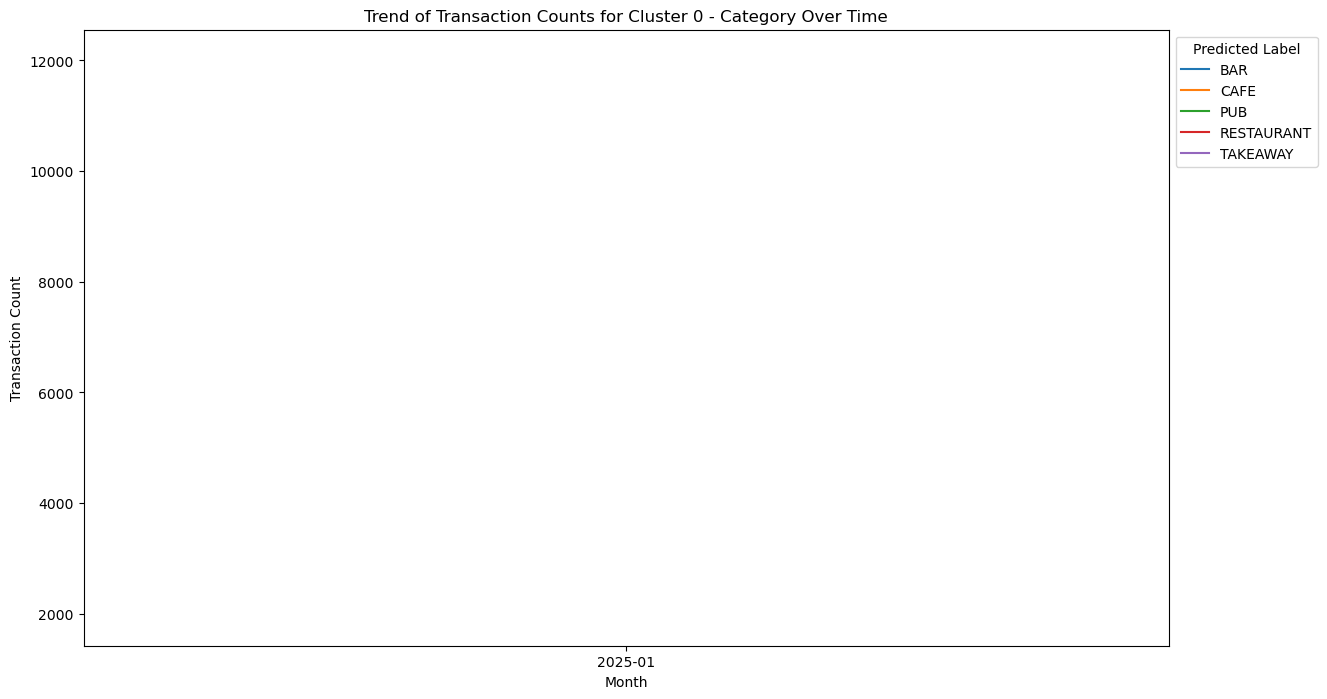

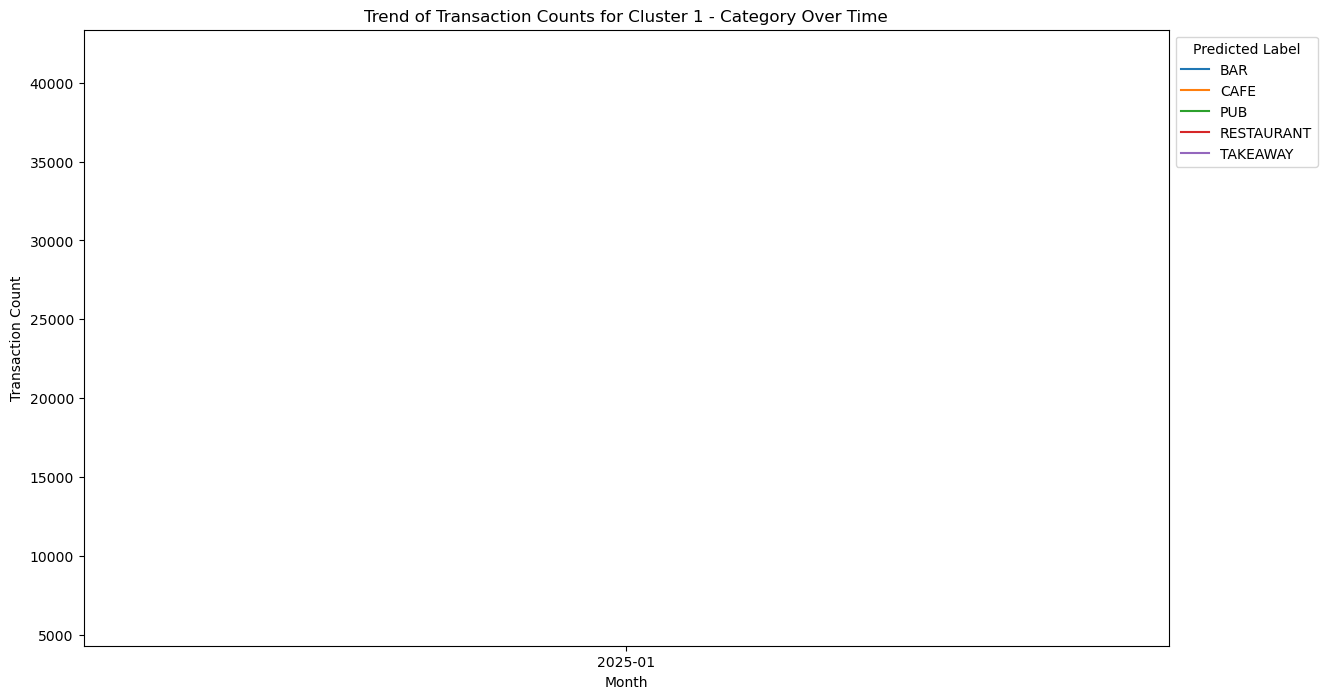

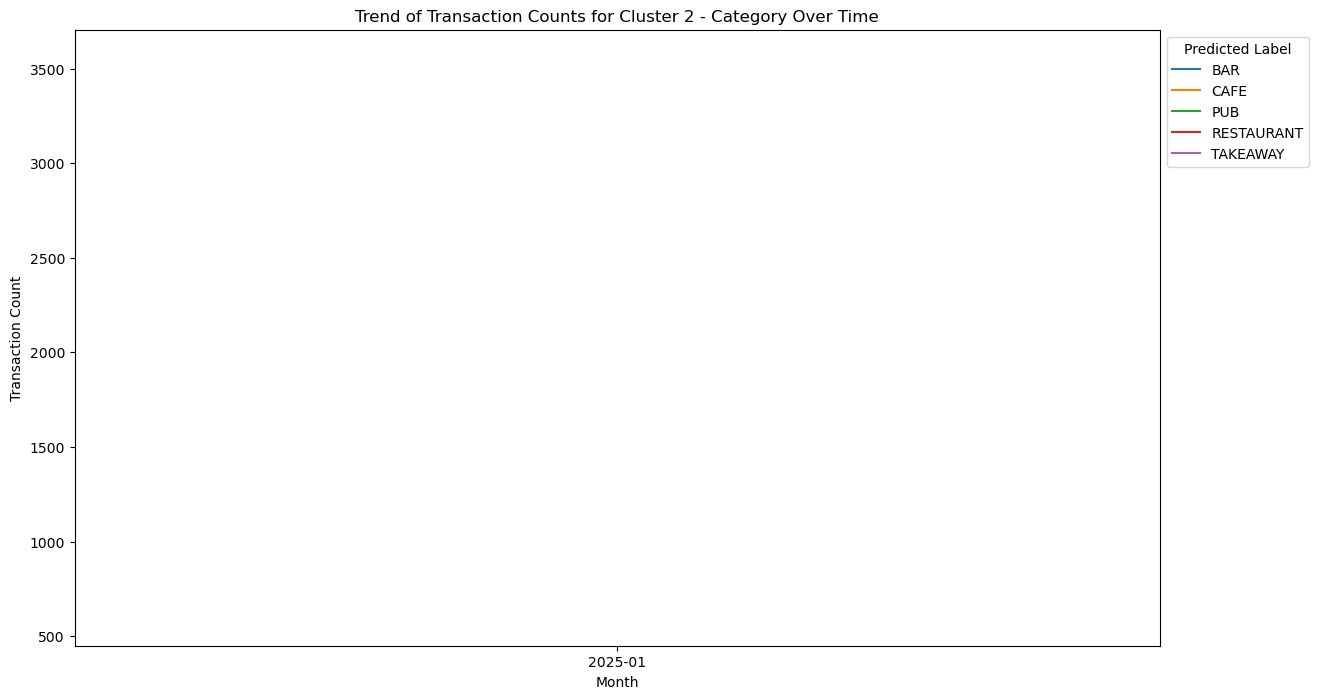

In [19]:
#3.1 Behavior of each Customer Segment

#1. Top 5 classification trend in Customer Segments based on transaction frequency

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data2 = df2.copy()

#data2['not_happened_yet_date'] = pd.to_datetime(df2['not_happened_yet_date'], format='%d-%m-%Y')

# Extract month from 'not_happened_yet_date'
data2['month_year'] = data2['not_happened_yet_date'].dt.strftime('%Y-%m')
#data2['month_year'] = data2['not_happened_yet_date'].dt.to_period('M')

# Group by 'cluster', 'predicted_label', and 'month'
grouped_data2 = data2.groupby(['cluster', 'predicted_label']).size().reset_index(name='transaction_count')

# Identify top 5 predicted labels for each 'cluster' based on transaction count
top_5_clusters = grouped_data2.groupby('cluster').apply(lambda x: x.nlargest(5, 'transaction_count')).reset_index(drop=True)

# Filter data2 based on top_5_clusters
filtered_data2 = data2[data2['predicted_label'].isin(top_5_clusters['predicted_label']) & data2['cluster'].isin(top_5_clusters['cluster'])]
#print(filtered_data2.head())

# Create separate plots for each cluster
for cluster in top_5_clusters['cluster'].unique():
    filtered_data_cluster = filtered_data2[filtered_data2['cluster'] == cluster]
    
    # Group by 'predicted_label' and 'month', counting the transactions
    grouped_data_cluster = filtered_data_cluster.groupby(['predicted_label', 'month_year']).size().reset_index(name='transaction_count')
    
    # Plot the trend over months for each predicted_label based on transaction_count
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='month_year', y='transaction_count', hue='predicted_label', data=grouped_data_cluster)
    plt.title(f'Trend of Transaction Counts for Cluster {cluster} - Category Over Time')
    plt.xlabel('Month')
    plt.ylabel('Transaction Count')
    plt.legend(title='Predicted Label', bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()


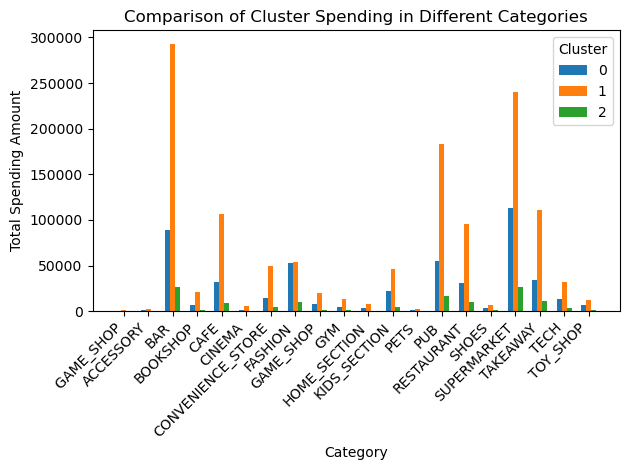

In [21]:
#3.2 Plot spending patterns for each Customer Segmentation

# Group by 'cluster' and 'category' to get the total spending in each category for each cluster
spending_by_cluster_category = df2.groupby(['cluster', 'predicted_label'])['monopoly_money_amount'].sum().reset_index()
#print(spending_by_cluster_category)

# Pivot the DataFrame for better visualization
pivot_table = spending_by_cluster_category.pivot(index='predicted_label', columns='cluster', values='monopoly_money_amount').fillna(0)

# Plotting the grouped bar chart comparing which clusters spend the most in each category
bar_width = 0.2
bar_positions = np.arange(len(pivot_table.index))
clusters = pivot_table.columns

for i, cluster in enumerate(clusters):
    plt.bar(bar_positions + i * bar_width, pivot_table[cluster], width=bar_width, label=cluster)

plt.xlabel('Category')
plt.ylabel('Total Spending Amount')
plt.title('Comparison of Cluster Spending in Different Categories')
plt.xticks(bar_positions + (len(clusters) - 1) * bar_width / 2, pivot_table.index, rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [22]:
#3.3 Top 5 spending categories for each Customer Segment

# Pivot the DataFrame for better visualization
pivot_table2 = spending_by_cluster_category.pivot_table(index='predicted_label', columns='cluster', values='monopoly_money_amount', aggfunc='sum', fill_value=0)

# Get the top 3 spending categories for each cluster
top_categories = pivot_table2.idxmax(axis=0)
top_3_spending_categories = pivot_table.apply(lambda x: x.nlargest(5).index.tolist(), axis=0)


# Display the top 5 spending categories for each cluster
print("Top 5 spending categories for each cluster:")
#print(top_categories)
print(top_3_spending_categories)


Top 5 spending categories for each cluster:
cluster            0            1            2
0        SUPERMARKET          BAR          BAR
1                BAR  SUPERMARKET  SUPERMARKET
2                PUB          PUB          PUB
3            FASHION     TAKEAWAY     TAKEAWAY
4           TAKEAWAY         CAFE   RESTAURANT


    cluster predicted_label        clv
0         0         FASHION  59.728538
1         0           SHOES  42.555556
2         0     SUPERMARKET  30.863488
3         0    HOME_SECTION  30.561538
4         0       GAME_SHOP  30.156923
5         1           SHOES  40.959770
6         1         FASHION  37.997554
7         1    HOME_SECTION  28.788820
8         1       GAME_SHOP  25.922239
9         1     SUPERMARKET  24.633435
10        2         FASHION  54.484496
11        2        TOY_SHOP  39.137931
12        2     SUPERMARKET  37.991458
13        2           SHOES  36.437500
14        2    HOME_SECTION  31.083333


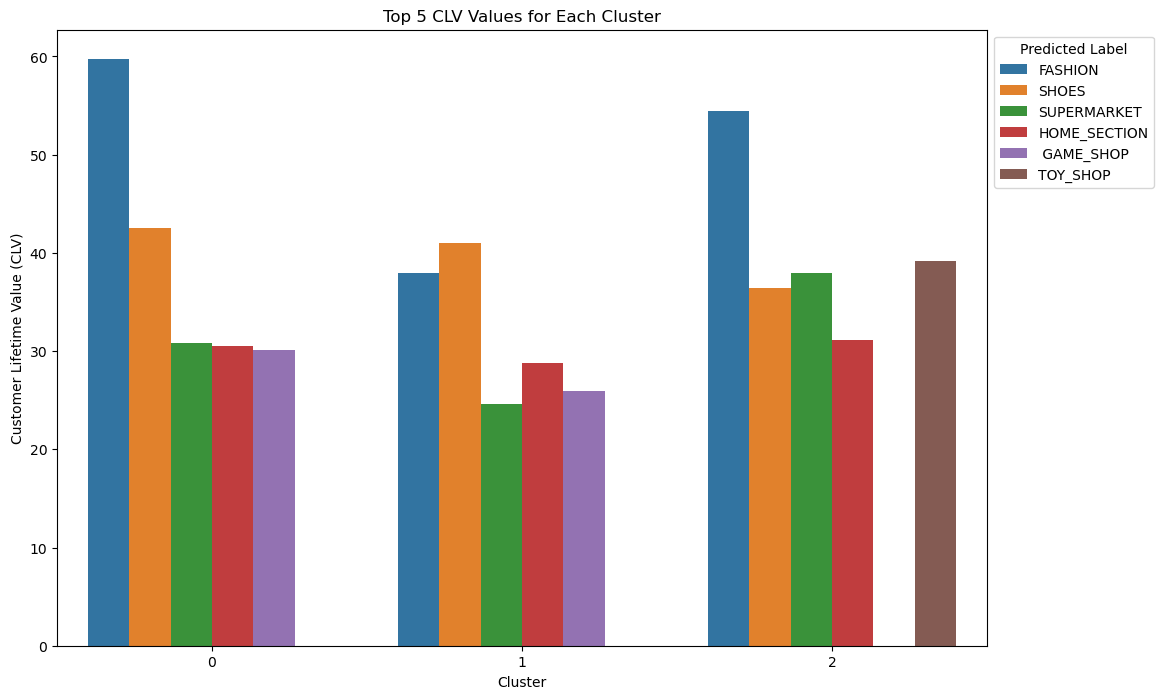

In [48]:
#4. Customer Lifetime Value (CLV)

data3 = df2.copy()

# Calculate total revenue per customer
data3['total_revenue'] = data3.groupby(['cluster', 'predicted_label', 'from_totally_fake_account'])['monopoly_money_amount'].transform('sum')

# Calculate total number of transactions per customer
data3['total_transactions'] = data3.groupby(['cluster', 'predicted_label', 'from_totally_fake_account'])['monopoly_money_amount'].transform('count')

# Calculate average revenue per transaction per customer
data3['avg_revenue_per_transaction'] = data3['total_revenue'] / data3['total_transactions']

# Calculate average transaction frequency compared to cluster + classification 
data3['avg_transaction_frequency'] = data3.groupby(['cluster', 'predicted_label'])['total_transactions'].transform(lambda x: x / x.max())

#Print the max no of transactions in each cluster + classification
#print(data3.groupby(['cluster', 'predicted_label'])['total_transactions'].nunique())

# Calculate CLV
data3['clv'] = data3['avg_revenue_per_transaction'] * data3['avg_transaction_frequency']

# Calculate average CLV for each category in a customer segment
average_clv_per_segment = data3.groupby(['cluster', 'predicted_label'])['clv'].mean().reset_index()

#print(average_clv_per_segment)
#print(data3)

top_5_clv_per_cluster = average_clv_per_segment.groupby('cluster').apply(lambda x: x.nlargest(5, 'clv')).reset_index(drop=True)
print(top_5_clv_per_cluster)


# Plot the top 5 CLV values for each cluster
plt.figure(figsize=(12, 8))

sns.barplot(x='cluster', y='clv', hue='predicted_label', data=top_5_clv_per_cluster)
plt.title('Top 5 CLV Values for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.legend(title='Predicted Label', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()